In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split

In [2]:
temp_df = pd.read_csv('./data/dane.csv')

 ## Zadanie: Stworzenie modelu deep learning symulującego funkcję y = 2*X. 

In [3]:
temp_df.head()

,X,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [4]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       1000 non-null   int64
 1   y       1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


<Axes: xlabel='X', ylabel='y'>

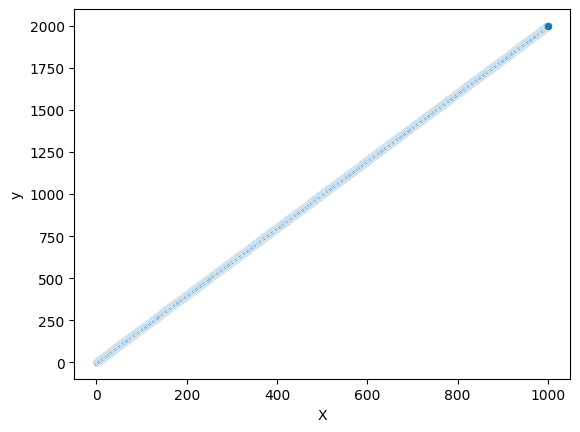

In [5]:
sns.scatterplot( x='X', y ='y', data=temp_df )

In [6]:
X = temp_df['X']
y = temp_df['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [8]:
X_train.shape

(400,)

In [9]:
model = tf.keras.Sequential()   

In [10]:
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 50 ))
model.add(tf.keras.layers.Dense(units = 50 ))
model.add(tf.keras.layers.Dense(units = 1 ))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2703 (10.56 KB)
Trainable params: 2703 (10.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.002), loss = 'mean_squared_error')

In [13]:
epochs_hist = model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
13/13 [==============================] - 0s 622us/step - loss: 433631.1250
Epoch 2/25
13/13 [==============================] - 0s 632us/step - loss: 65460.2969
Epoch 3/25
13/13 [==============================] - 0s 613us/step - loss: 8140.7192
Epoch 4/25
13/13 [==============================] - 0s 558us/step - loss: 3511.1416
Epoch 5/25
13/13 [==============================] - 0s 611us/step - loss: 1280.1245
Epoch 6/25
13/13 [==============================] - 0s 572us/step - loss: 303.4220
Epoch 7/25
13/13 [==============================] - 0s 569us/step - loss: 72.9636
Epoch 8/25
13/13 [==============================] - 0s 523us/step - loss: 17.2211
Epoch 9/25
13/13 [==============================] - 0s 540us/step - loss: 5.2406
Epoch 10/25
13/13 [==============================] - 0s 503us/step - loss: 1.5726
Epoch 11/25
13/13 [==============================] - 0s 564us/step - loss: 0.4692
Epoch 12/25
13/13 [==============================] - 0s 535us/step - loss: 0.1597
Epo

In [14]:
epochs_hist.history.keys()

dict_keys(['loss'])

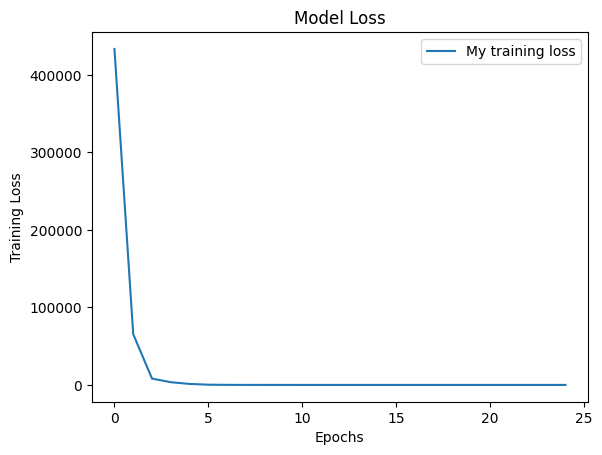

In [15]:
plt.plot(epochs_hist.history['loss'] )
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['My training loss'] )

In [18]:
## Testowe Wartosci
X_new = np.array([-20])

In [17]:
y_pred = model.predict(X_new)
print("Przewidywane wartości y:", y_pred.flatten())


1/1 [==============================] - 0s 33ms/step
Przewidywane wartości y: [-39.57193]


## Nie udało się w pełni odwzorować funkcji y=2*x przy pomocy Sieci Neuronowych. Zmiana parametrów powoduje jednie zmianę płędu, lecz go całkowicie nie eliminuje. Przykladowo dla wartości -20 model generuje wartość -39.57.
